In [9]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### data overview

In [5]:
data = pd.read_csv('data.csv')
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


null values and data types

In [7]:
print(data.dtypes)
print(data.isnull().sum())

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Mo

unique values

In [8]:
unique_counts = data.nunique().sort_values(ascending=False)
unique_counts

customerID          7043
TotalCharges        6531
MonthlyCharges      1585
tenure                73
PaymentMethod          4
StreamingMovies        3
TechSupport            3
OnlineBackup           3
StreamingTV            3
DeviceProtection       3
MultipleLines          3
InternetService        3
OnlineSecurity         3
Contract               3
Partner                2
SeniorCitizen          2
gender                 2
Dependents             2
PhoneService           2
PaperlessBilling       2
Churn                  2
dtype: int64

numerical columns

In [10]:
num_cols = data.select_dtypes([np.number]).columns.tolist()
data[num_cols]

,SeniorCitizen,tenure,MonthlyCharges
0,0,1,29.85
1,0,34,56.95
2,0,2,53.85
3,0,45,42.30
4,0,2,70.70
...,...,...,...
7038,0,24,84.80
7039,0,72,103.20
7040,0,11,29.60
7041,1,4,74.40


<Axes: xlabel='feature', ylabel='value'>

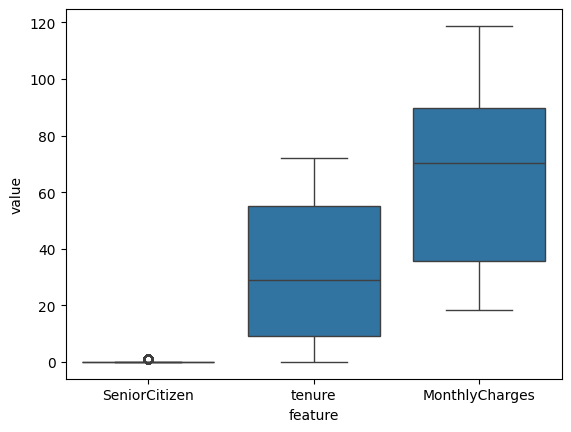

In [12]:
# make pairs with column names (feature, value) e.g. ('SeniorCitizen',0)
df_long = data[num_cols].melt(var_name='feature', value_name='value')
# make box plot x-axis: features, y-axis: values
sns.boxplot(x='feature',y='value', data = df_long)
